# Find Descriptors (Matching)

Similar to classification, VDMS supports feature vector search based on similariy matching as part of its API.

In this example, where we have a pre-load set of feature vectors and labels associated, 
we can search for similar feature vectors, and query information related to it.

We will start by taking a new image, not seeing by VDMS before (FIX THIS), 
find the faces on it, and run feature vector extraction, and finding images related to it:


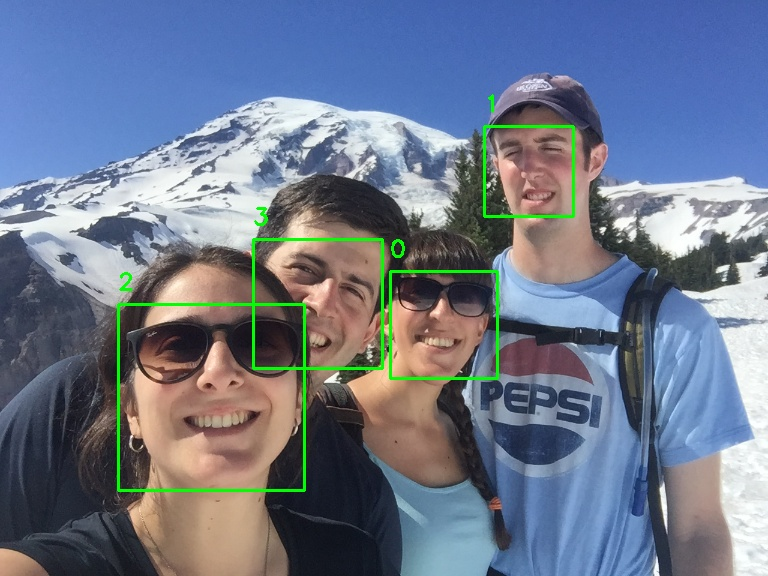

In [1]:
import getDescriptors as g

imagePath = "images/1.jpg"
descriptors = g.get_descriptors(imagePath)

Now that we have the new faces and its feature vectors, we can ask VDMS to return the similar descriptors.

But first, let's connect to VDMS:

In [2]:
import vdms

db = vdms.vdms()
db.connect("localhost")

We can now search for similar descriptors by passing the descriptor of the face to VDMS as follows:

In [3]:
import numpy as np
import json
import util

who_is_this = descriptors[1] # Number 1 is Tom's face

blob_array = []

query = """
[
   {
      "FindDescriptor" : {
         "set": "hike_mt_rainier", 
         "_ref": 33, 
         "k_neighbors": 4, 
         "results": {
             "list": ["_distance", "_id", "_label"] 
         }
      }
   }
]
"""

blob_array.append(who_is_this)

response, images = db.query(query, [blob_array])
print (db.get_last_response_str())

[
    {
        "FindDescriptor": {
            "status": 0,
            "entities": [
                {
                    "_id": 43,
                    "_label": "tom",
                    "_distance": 0.0429537408053875
                },
                {
                    "_id": 40,
                    "_label": "tom",
                    "_distance": 0.14148035645484924
                },
                {
                    "_id": 34,
                    "_label": "tom",
                    "_distance": 0.17108523845672607
                },
                {
                    "_id": 7,
                    "_label": "tom",
                    "_distance": 0.17219048738479614
                }
            ],
            "returned": 4
        }
    }
]


Now that we can see this similar descriptors, let's go one step further and retrieve the images asociated with those descriptors:  

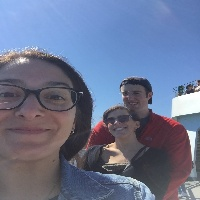

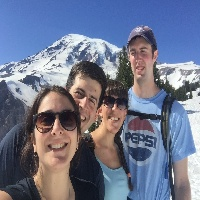

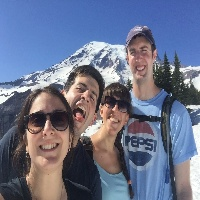

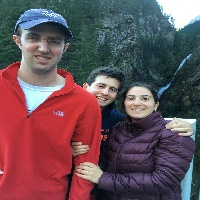

Number of images: 4


In [4]:
blob_array = []

query = """
[
   {
      "FindDescriptor" : {
         "set": "hike_mt_rainier", 
         "_ref": 33, 
         "k_neighbors": 5, 
         "results": {
             "list": ["_distance", "_id"] 
         }
      }
   },
   {
      "FindImage" : {
         "link":  { "ref": 33 }, 
         "operations": [
             {
                 "type": "resize",
                 "height": 200,
                 "width": 200
             }
         ],

         "results": {
             "list": ["name_file"]
         }
      }
   }
]
"""

blob_array.append(who_is_this)

response, images = db.query(query, [blob_array])

util.display_images(images)
    
print ("Number of images:", len(images))


In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

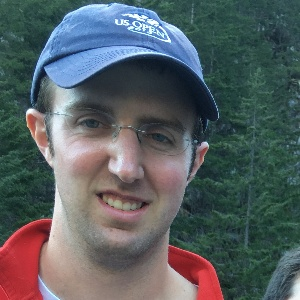

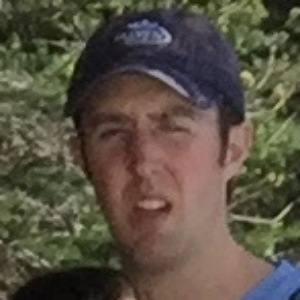

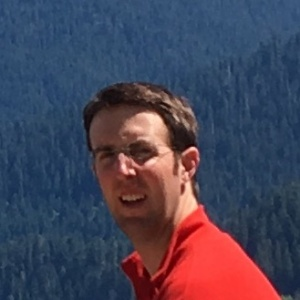

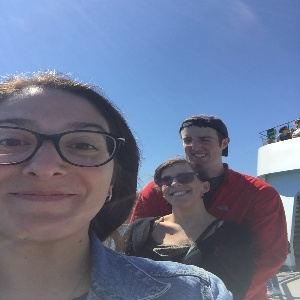

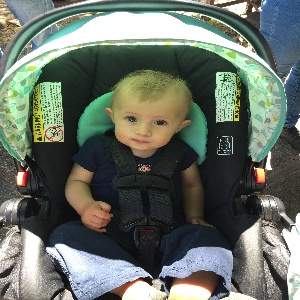

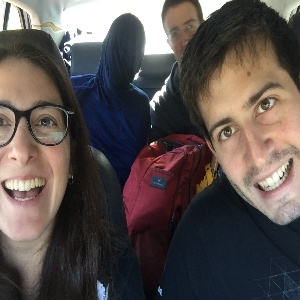

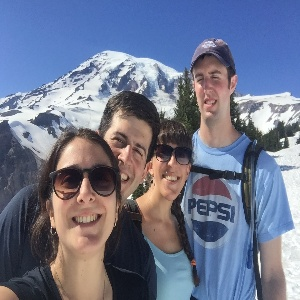

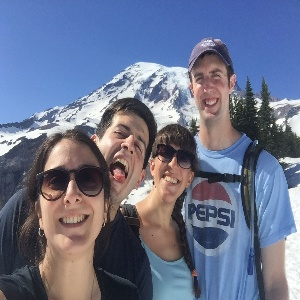

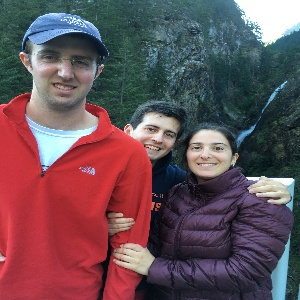

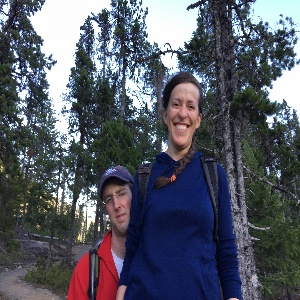

Number of images: 10


In [6]:
import vdms
import numpy as np
import json

db = vdms.vdms()
db.connect("localhost")

who_is_this = descriptors[1]

blob_array = []

query = """
[
   {
      "FindDescriptor" : {
         "set": "hike_mt_rainier", 
         "_ref": 33, 
         "k_neighbors": 1, 
         "results": {
             "list": ["_distance", "_id"] 
         }
      }
   }, 
   {
      "FindEntity" : {
         "class": "Person", 
         "link":  { "ref": 33 },
         "_ref": 34,
         "results": {
             "list": ["name", "lastname"]
         }
      }
   },
   {
      "FindImage" : {
         "link":  { "ref": 34 }, 
         "operations": [
             {
                 "type": "resize",
                 "height": 300,
                 "width": 300
             }
         ],

         "results": {
             "list": ["name_file"]
         }
      }
   }
]
"""

blob_array.append(who_is_this)

response, images = db.query(query, [blob_array])

util.display_images(images)    
print ("Number of images:", len(images))
